**Introduction:**

This project performs the K-Nearest-Neighbor Regression on a 100 generated data samples and obtains the closest neighbor information for various K values. The project is divided into 7 cases.

- case1: K=1, the K neighbors contribute equally
- case2: K=3, the K neighbors contribute equally
- case3: K-50, the K neighbors contribute equally
- case4: K=1, each of the K neighbors has an influence that is inversely proportional to the distance from the point
- case5: K=3, each of the K neighbors has an influence that is inversely proportional to the distance from the point
- case6: K=50, each of the K neighbors has an influence that is inversely proportional to the distance from the point
- case7: K=N,each of the K neighbors has an influence that is inversely proportional to the distance from the point


Steps involved:

- Step1: Data Preparation of X
- Step2: Data Preparation of y
- Step3: KNN Regression modeling for each of the above seven cases
- Step4: Obtain predictions for the test set for each of the above seven cases
- Step5: Plots for each of the above seven cases


#### Step1: Data Preparation of X

Consider a single dimension (variable) X. Obtain N = 100 iid samples x1, x2, · · · of X uniformly randomly between 1 and 10, and then obtain the corresponding y values as the natural logarithm of x plus a Gaussian noise (mean 0, standard deviation 0.1), with different points having different amounts of noise. 

In [3]:
import pandas as pd
import numpy as np

In [30]:
np.random.seed(44)
N = 100
X = np.random.uniform(low=1,high=10,size=N)
X

array([8.51357934, 1.94316494, 7.70176434, 4.24450753, 4.23379754,
       6.48314543, 4.54401596, 4.68165349, 5.58912169, 7.39133194,
       9.64473603, 5.10958998, 4.84886369, 2.02117331, 2.96108982,
       9.61724862, 9.49015648, 8.93641853, 6.81769506, 2.92442331,
       6.73148812, 2.25231627, 5.12833663, 8.86476867, 3.32605275,
       6.98365988, 8.76406902, 2.33963257, 6.06654962, 2.43239737,
       2.55605434, 1.93620665, 2.82643834, 5.09670367, 8.15117425,
       9.91740413, 8.24515481, 4.39673865, 5.64163683, 1.53009029,
       7.39986118, 1.65257032, 8.94350424, 7.53452037, 8.50029591,
       7.39207615, 7.27686926, 9.37092523, 8.93505474, 1.85474785,
       5.10846776, 5.43451143, 1.98076154, 2.38361015, 9.8585563 ,
       3.44404138, 9.07436698, 2.47811181, 2.19122465, 3.85618062,
       3.76680303, 4.79849668, 3.97896752, 6.11267836, 1.85756195,
       8.18179736, 3.41790733, 9.20273422, 9.11569582, 1.1427202 ,
       8.68314021, 7.08045556, 1.33912263, 3.7805305 , 6.07824

#### Step2: Data Preparation of y

Gaussian noise (mean 0, standard deviation 0.1) with different points having different amounts of noise.
Note: Guassian is nothing but normal distribution, therefore using numpy.random.normal gives 100 noises (size=100)

In [7]:
np.random.seed(44)
noise_list = np.random.normal(loc=0,scale=0.1,size=100)
noise_list

array([-7.50614717e-02,  1.31635732e-01,  1.24614003e-01, -1.60491574e-01,
       -1.46814368e-01, -1.71507046e-01,  1.85878369e-01,  8.75879763e-03,
       -5.23221964e-03,  5.55471637e-02, -9.63403694e-02, -1.80321465e-02,
       -1.18340916e-01,  6.05445921e-02, -9.51650553e-02,  3.60856060e-02,
        1.06061026e-01, -1.17152178e-02,  8.25664851e-02, -1.20981355e-01,
       -1.19050362e-01,  2.19871821e-02, -2.12919130e-02, -1.41149914e-01,
       -4.82981016e-02,  1.20176208e-01, -7.05803033e-02,  2.51813547e-03,
       -3.91128155e-02,  1.93139124e-02,  3.49290932e-02,  5.91188382e-02,
        5.20409870e-02,  8.25222389e-02,  4.26203507e-02,  1.95640026e-02,
       -5.14112178e-02, -3.07368882e-01, -3.95159070e-02, -7.95399184e-02,
       -7.03201512e-02, -1.73739268e-01,  7.50808258e-02, -1.86395314e-01,
        4.18510984e-02, -2.35333837e-02,  4.32107174e-02,  8.70291930e-02,
        2.00862219e-01,  1.37177091e-01,  1.05859789e-01,  1.44533756e-01,
        4.88232904e-03,  

In [8]:
y = list()
for x_i, noise_i in zip(X, noise_list):
    # natural logarithm of x is just np.log where as log10 is np.log10
    y_i = np.log(x_i) + noise_i
    y.append(y_i)
print(y)

[2.0666009861899353, 0.7959537882645583, 2.1660634399073024, 1.2851342262588346, 1.2962849860692705, 1.6976987519753934, 1.6996895628426043, 1.552410154718567, 1.7155899328729944, 2.05585511783081, 2.170071907656952, 1.6130870157888915, 1.460403471074548, 0.7642227814305482, 0.9903923290546297, 2.2996438236784384, 2.3563161274152136, 2.1784196792666766, 2.002087932282761, 0.952115946807709, 1.7877458756014388, 0.8339463211808006, 1.613489450463088, 2.0409349296851977, 1.153488139825443, 2.063749325684543, 2.1000799943457484, 0.8525120300326454, 1.7636771969070741, 0.9081912571538369, 0.9733938889676337, 0.7198495615111496, 1.091058367837915, 1.7111162305585266, 2.1407823468643308, 2.3138552090726425, 2.0582145136622363, 1.1734941689821088, 1.6906583345614377, 0.3457868298738342, 1.9311410888445042, 0.3285925781911909, 2.2660083110429, 1.833099861605635, 2.181952074502669, 1.9768752528520055, 2.0279114409548966, 2.32464102834986, 2.3908444937207247, 0.7549258474969294, 1.736759295690728

#### Step3 : KNN Regression Modeling

Now use K-NN regression to obtain yˆ values (= estimates of y) at x-values of 1, 3, 5, 7 and 9 for each of the following three schemes:


case1,2,3: the K neighbors contribute equally (separately for K = 1, 3, 50)

case4,5,6: each of the K neighbors has an influence that is inversely proportional to the distance
from the point (separately for K = 1, 3, 50)

case7: all the N points contribute, with each contribution proportional to e−12d2, where d represents distance.

While I recommend that you write all (most) of the code from scratch without using off-the-shelf packages (we learn best when we write code to implement algorithms from scratch), you may use packages, including the ones where K-NN regression is available as a ready-to-use function. E.g., you may use numpy, scipy, sklearn
(sklearn.neighbors.KNeighborsRegressor may come in handy), matplotlib, and seaborn. There will be no penalty for using packages.

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
X_test = [1,3,5,7,9] # Should we do np.delete? change this if required

In [23]:
# convert shapes and to numpy to give as model input
X_numpy = np.asarray(X).reshape(-1,1) # use np.delete if required
y_numpy = np.asarray(y).reshape(-1,1)

In [24]:
# case1:the K neighbors contribute equally 
uniform_k_1_nn_reg_model_class = KNeighborsRegressor(n_neighbors=1, weights='uniform')
uniform_k_1_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=1)

In [25]:
# case2:the K neighbors contribute equally 
uniform_k_3_nn_reg_model_class = KNeighborsRegressor(n_neighbors=3, weights='uniform')
uniform_k_3_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=3)

In [26]:
# case3:the K neighbors contribute equally 
uniform_k_50_nn_reg_model_class = KNeighborsRegressor(n_neighbors=50, weights='uniform')
uniform_k_50_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=50)

In [27]:
# case4: each of the K neighbors has an influence that is inversely proportional to the distance from the point
distance_k_1_nn_reg_model_class = KNeighborsRegressor(n_neighbors=1, weights='distance')
distance_k_1_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=1, weights='distance')

In [28]:
# case5: each of the K neighbors has an influence that is inversely proportional to the distance from the point
distance_k_3_nn_reg_model_class = KNeighborsRegressor(n_neighbors=3, weights='distance')
distance_k_3_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [29]:
# case6: each of the K neighbors has an influence that is inversely proportional to the distance from the point
distance_k_50_nn_reg_model_class = KNeighborsRegressor(n_neighbors=50, weights='distance')
distance_k_50_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=50, weights='distance')

In [31]:
# case7: all the N points contribute, with each contribution proportional to e−12d2, where d represents distance.

def custom_function(array_distances:list)->list:
    """
        Returns:
            (array of weights)
    """
    output_weights = []
    
    for dist in array_distances:
        power_value = -1 * 0.5 * dist * dist
        output_weights.append(np.exp(power_value))
    return output_weights

# N= 100 is defined in the data preparation
k_all_N_nn_reg_model_class = KNeighborsRegressor(n_neighbors=N, weights=custom_function)
k_all_N_nn_reg_model_class.fit(X_numpy,y_numpy)

KNeighborsRegressor(n_neighbors=100,
                    weights=<function custom_function at 0x7fd568c859d0>)

#### Step4 and Step5:  Obtain predictions for the test set for each of the above seven cases and Plot the closest neighbor

Next three cells are helper functions that are reused

In [33]:
def get_and_print_predictions(model_class_object, x_test_values):

    # Print the numerical values of the (x, yˆ) pairs 
    y_hat_output = [model_class_object.predict([[xi]]) for xi in x_test_values]
    predictions_x_y_hat = []
    for x_pred, y_pred in zip(x_test_values, y_hat_output):
        # (x, y^)
        current_prediction = (x_pred, y_pred[0][0])
        print (current_prediction)
        predictions.append(current_prediction)
    return predictions_x_y_hat

In [40]:
#Also, plot the (x′,y′) and (x,yˆ) points for each of these seven cases, where x′ is the point 
#(out of the 100 sample points) closest to x and y′ is the y-value of x′ 

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors

def get_x_y_prime_for_plot(model_class_obj, preds_x_y_hat):

    x_values = []
    y_hat_values = []
    x_prime_values = []
    y_prime_values = []


    for x, y_hat in preds_x_y_hat:
        print("Extracting closest neightbor for x=", x, ", y_hat=", y_hat)
        
        # n_neighbors = 1, because we need the closest neighbor
        closes_neighbor_info = model_class_obj.kneighbors(X=[[x]],n_neighbors=1, return_distance=True)
        
        closes_neighbor_distance = closes_neighbor_info[0][0][0]
        closes_neighbor_index_in_X = closes_neighbor_info[1][0][0]
        
        # closest neighbor is x_prime and simaltenously y_prime
        x_prime = X[closes_neighbor_index_in_X]
        y_prime = y[closes_neighbor_index_in_X]
        print("Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime)", (x_prime, y_prime))
        
        # gather the below values for scatter plot
        x_values.append(x)
        y_hat_values.append(y_hat)
        x_prime_values.append(x_prime)
        y_prime_values.append(y_prime)
        
    return x_values, y_hat_values, x_prime_values, y_prime_values
    
import matplotlib.pyplot as plt


def scatter_plot_closest_neighbor(model_class_obj, preds_x_y_hat, title: str):
    x_values, y_hat_values, x_prime_values, y_prime_values = get_x_y_prime_for_plot(model_class_obj, preds_x_y_hat)
    plt.figure(figsize=(15, 7), dpi=80)
    plt.scatter(x_values, y_hat_values, marker="*", color=['red','green', 'black', 'orange', 'blue']) 
    plt.scatter(x_prime_values, y_prime_values, marker="^", color=['red','green', 'black', 'orange', 'blue'])
    plt.xlabel("X values or X Prime Values")
    plt.ylabel("Y hat values or Y Prime Values")
    plt.title(title)
    plt.show()
    

(1, 0.21099533446746474)
(3, 0.9903923290546297)
(5, 1.7111162305585266)
(7, 2.063749325684543)
(9, 2.2660083110429)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 0.21099533446746474
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.9903923290546297
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.7111162305585266
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 2.063749325684543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.2660083110429
Closest neightbor x_prime and its corresponding y_prime i

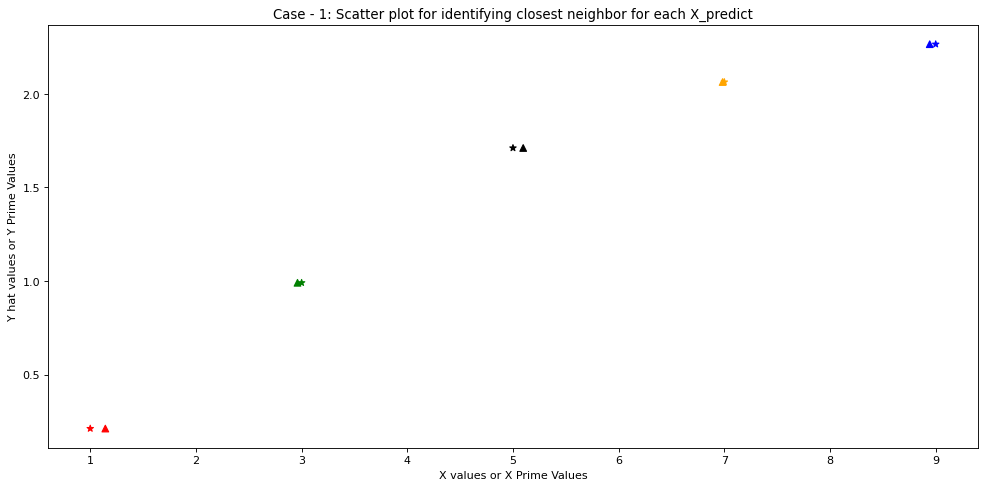

In [51]:
# case1: predictions
uniform_K_1_predictions_x_y_hat = get_and_print_predictions(uniform_k_1_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case1 plot
scatter_plot_closest_neighbor(uniform_k_1_nn_reg_model_class, uniform_K_1_predictions_x_y_hat,
                             title="Case - 1: Scatter plot for identifying closest neighbor for each X_predict")

(1, 0.12370091070589033)
(3, 1.0111888812334178)
(5, 1.6869875140127155)
(7, 1.9358189752658455)
(9, 2.278424161343434)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 0.12370091070589033
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.0111888812334178
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.6869875140127155
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9358189752658455
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.278424161343434
Closest neightbor x_prime and its corresponding y_p

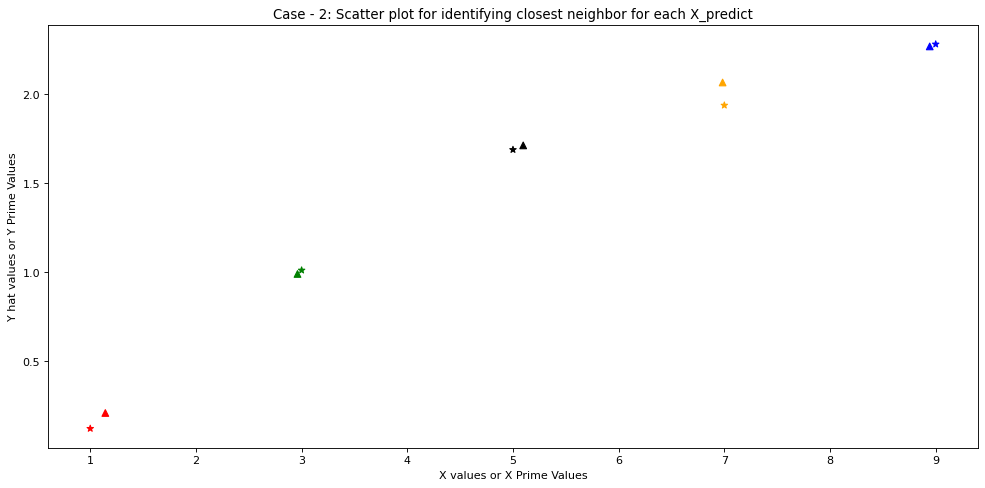

In [50]:
# case2: predictions
uniform_K_3_predictions_x_y_hat = get_and_print_predictions(uniform_k_3_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case2 plot
scatter_plot_closest_neighbor(uniform_k_3_nn_reg_model_class, uniform_K_3_predictions_x_y_hat,
                             title="Case - 2: Scatter plot for identifying closest neighbor for each X_predict")

(1, 1.058126243213993)
(3, 1.058126243213993)
(5, 1.5729968508327543)
(7, 1.9427135910041884)
(9, 2.047947983008306)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.5729968508327543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9427135910041884
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.047947983008306
Closest neightbor x_prime and its corresponding y_prime i

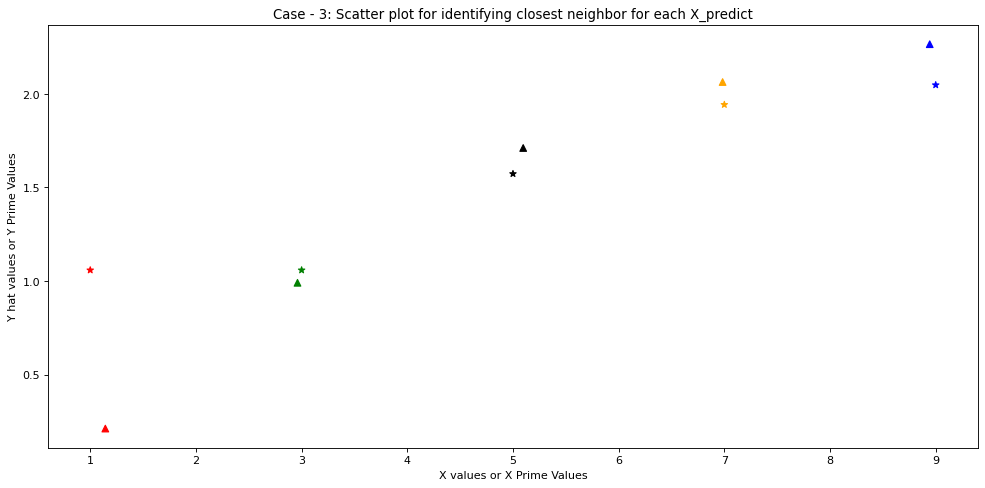

In [52]:
# case3: predictions
uniform_K_50_predictions_x_y_hat = get_and_print_predictions(uniform_k_50_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case3 plot
scatter_plot_closest_neighbor(uniform_k_50_nn_reg_model_class, uniform_K_50_predictions_x_y_hat,
                             title="Case - 3: Scatter plot for identifying closest neighbor for each X_predict")

(1, 0.21099533446746474)
(3, 0.9903923290546297)
(5, 1.7111162305585266)
(7, 2.063749325684543)
(9, 2.2660083110429)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 0.21099533446746474
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.9903923290546297
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.7111162305585266
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 2.063749325684543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.2660083110429
Closest neightbor x_prime and its corresponding y_prime i

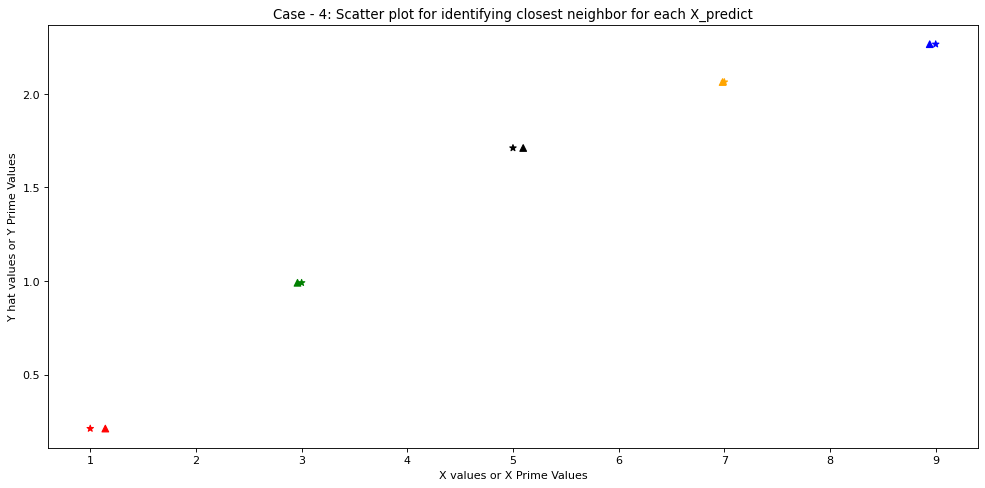

In [54]:
# case4: predictions
distance_K_1_predictions_x_y_hat = get_and_print_predictions(uniform_k_1_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case3 plot
scatter_plot_closest_neighbor(uniform_k_1_nn_reg_model_class, uniform_K_1_predictions_x_y_hat,
                             title="Case - 4: Scatter plot for identifying closest neighbor for each X_predict")

(1, 0.12370091070589033)
(3, 1.0111888812334178)
(5, 1.6869875140127155)
(7, 1.9358189752658455)
(9, 2.278424161343434)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 0.12370091070589033
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.0111888812334178
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.6869875140127155
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9358189752658455
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.278424161343434
Closest neightbor x_prime and its corresponding y_p

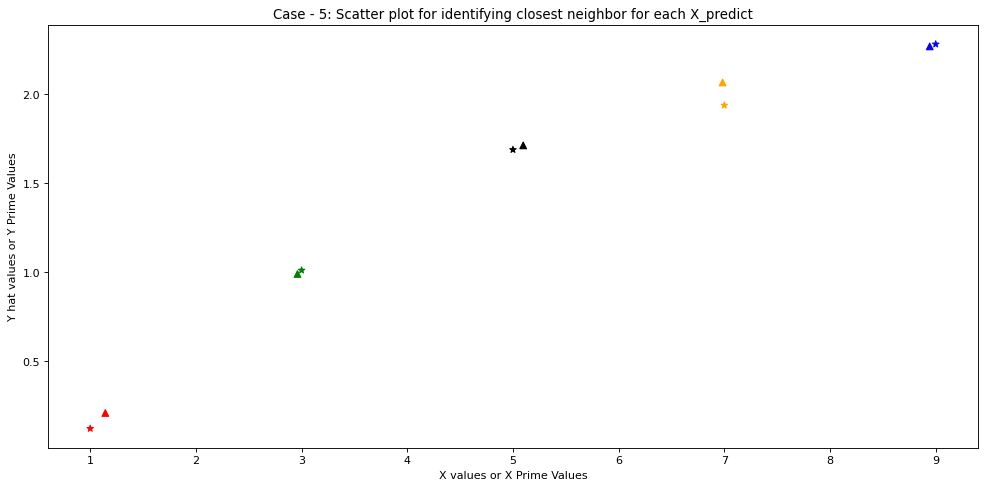

In [55]:
# case5: predictions
distance_K_3_predictions_x_y_hat = get_and_print_predictions(uniform_k_3_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case3 plot
scatter_plot_closest_neighbor(uniform_k_3_nn_reg_model_class, uniform_K_3_predictions_x_y_hat,
                             title="Case - 5: Scatter plot for identifying closest neighbor for each X_predict")

(1, 1.058126243213993)
(3, 1.058126243213993)
(5, 1.5729968508327543)
(7, 1.9427135910041884)
(9, 2.047947983008306)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 1.058126243213993
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.5729968508327543
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9427135910041884
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.047947983008306
Closest neightbor x_prime and its corresponding y_prime i

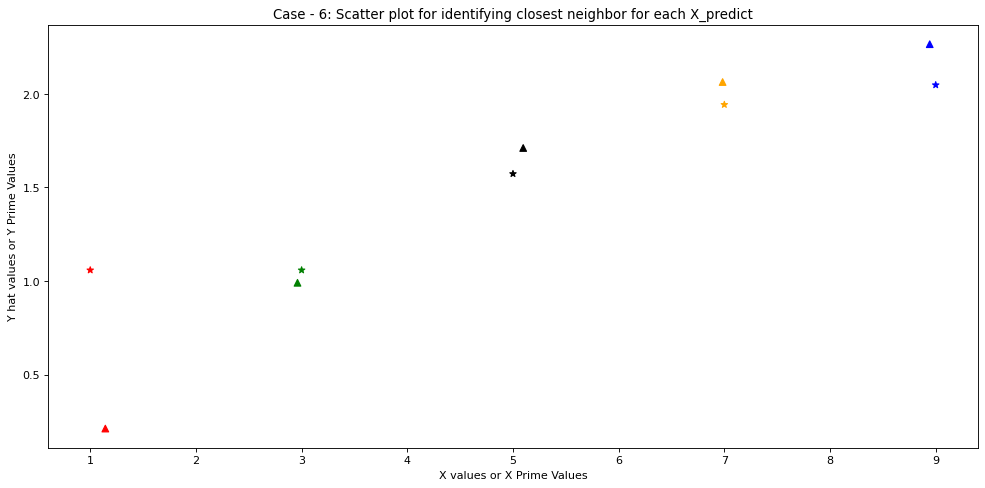

In [57]:
# case6: predictions
distance_K_50_predictions_x_y_hat = get_and_print_predictions(uniform_k_50_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case3 plot
scatter_plot_closest_neighbor(uniform_k_50_nn_reg_model_class, uniform_K_50_predictions_x_y_hat,
                             title="Case - 6: Scatter plot for identifying closest neighbor for each X_predict")

(1, 0.5717947561427066)
(3, 0.998368242164413)
(5, 1.5836953032361603)
(7, 1.9287950179337898)
(9, 2.1676794277689146)
Done printing predictions
Extracting closest neightbor for x= 1 , y_hat= 0.5717947561427066
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (1.1427202031613746, 0.21099533446746474)
Extracting closest neightbor for x= 3 , y_hat= 0.998368242164413
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (2.961089824118717, 0.9903923290546297)
Extracting closest neightbor for x= 5 , y_hat= 1.5836953032361603
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (5.096703670505991, 1.7111162305585266)
Extracting closest neightbor for x= 7 , y_hat= 1.9287950179337898
Closest neightbor x_prime and its corresponding y_prime is: (x_prime,y_prime) (6.983659879862785, 2.063749325684543)
Extracting closest neightbor for x= 9 , y_hat= 2.1676794277689146
Closest neightbor x_prime and its corresponding y_pri

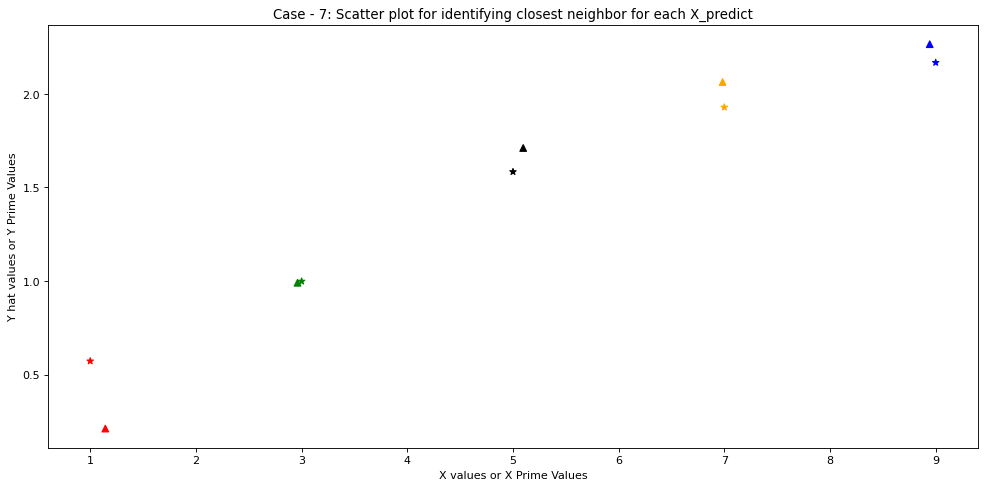

In [58]:
# case7: predictions
k_all_N_predictions_x_y_hat = get_and_print_predictions(k_all_N_nn_reg_model_class, X_test)
print("Done printing predictions")
# will be used in the graph
# case3 plot
scatter_plot_closest_neighbor(k_all_N_nn_reg_model_class, k_all_N_predictions_x_y_hat,
                             title="Case - 7: Scatter plot for identifying closest neighbor for each X_predict")

**Conclusion**:
    
    As seen above, we have performed KNN regression in various cases and obtained the scatterplots accordingly for the closest neighbor in each case. We have leveraged sklearn python library to use KNNRegression model class.